## Clustering Produktivitas *AI* *Developer* Berdasarkan Faktor Harian

## EDA

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import seaborn as sns

In [37]:
df = pd.read_csv('../dataset/Productivity.csv')

In [38]:
df.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load,task_success
0,5.99,600,1,5.8,2,1,0.71,5.4,1
1,4.72,568,2,6.9,5,3,1.75,4.7,1
2,6.30,560,1,8.9,2,0,2.27,2.2,1
3,8.05,600,7,6.3,9,5,1.40,5.9,0
4,4.53,421,6,6.9,4,0,1.26,6.3,1


In [39]:
df.duplicated().sum()

0

In [40]:
df['task_success'].value_counts(normalize=True) * 100

task_success
1    60.6
0    39.4
Name: proportion, dtype: float64

In [41]:
df_target = df['task_success']
df = df.drop(columns='task_success')

Kolom task_success harus dibuang diawal untuk menemukan pola atau kelompok yang ada secara alami dalam data, tanpa terpengaruhi oleh label yang sudah diketahui. Jika kita menyertakan task_success, algoritma tidak akan menemukan pola tersembunyi, melainkan hanya akan mengelompokkan hari-hari menjadi dua kategori yang sudah jelas sejak awal yaitu hari "sukses" dan hari "gagal". Dengan memisahkan kolom ini, kita bisa secara independen mengidentifikasi faktor-faktor (seperti jam tidur, kafein, atau distraksi) yang berhubungan dengan keberhasilan, dan kemudian menggunakan task_success untuk memvalidasi klaster.

In [42]:
df.head(5)

,hours_coding,coffee_intake_mg,distractions,sleep_hours,commits,bugs_reported,ai_usage_hours,cognitive_load
0,5.99,600,1,5.8,2,1,0.71,5.4
1,4.72,568,2,6.9,5,3,1.75,4.7
2,6.30,560,1,8.9,2,0,2.27,2.2
3,8.05,600,7,6.3,9,5,1.40,5.9
4,4.53,421,6,6.9,4,0,1.26,6.3


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   hours_coding      500 non-null    float64
 1   coffee_intake_mg  500 non-null    int64  
 2   distractions      500 non-null    int64  
 3   sleep_hours       500 non-null    float64
 4   commits           500 non-null    int64  
 5   bugs_reported     500 non-null    int64  
 6   ai_usage_hours    500 non-null    float64
 7   cognitive_load    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


#### Fitur Numerik

##### Distribusi

In [44]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,500.0,5.01560,1.947253,0.0,3.6000,5.03,6.275,12.00
coffee_intake_mg,500.0,463.19200,142.334991,6.0,369.5000,500.50,600.000,600.00
distractions,500.0,2.97600,1.678409,0.0,2.0000,3.00,4.000,8.00
sleep_hours,500.0,6.97580,1.455965,3.0,6.1000,6.95,7.900,10.00
commits,500.0,4.60800,2.704990,0.0,3.0000,5.00,6.000,13.00
bugs_reported,500.0,0.85800,1.102846,0.0,0.0000,0.00,2.000,5.00
ai_usage_hours,500.0,1.51092,1.085557,0.0,0.6975,1.26,2.070,6.36
cognitive_load,500.0,4.49820,1.868861,1.0,3.1750,4.40,5.800,10.00



 PERSEBARAN FITUR NUMERIK


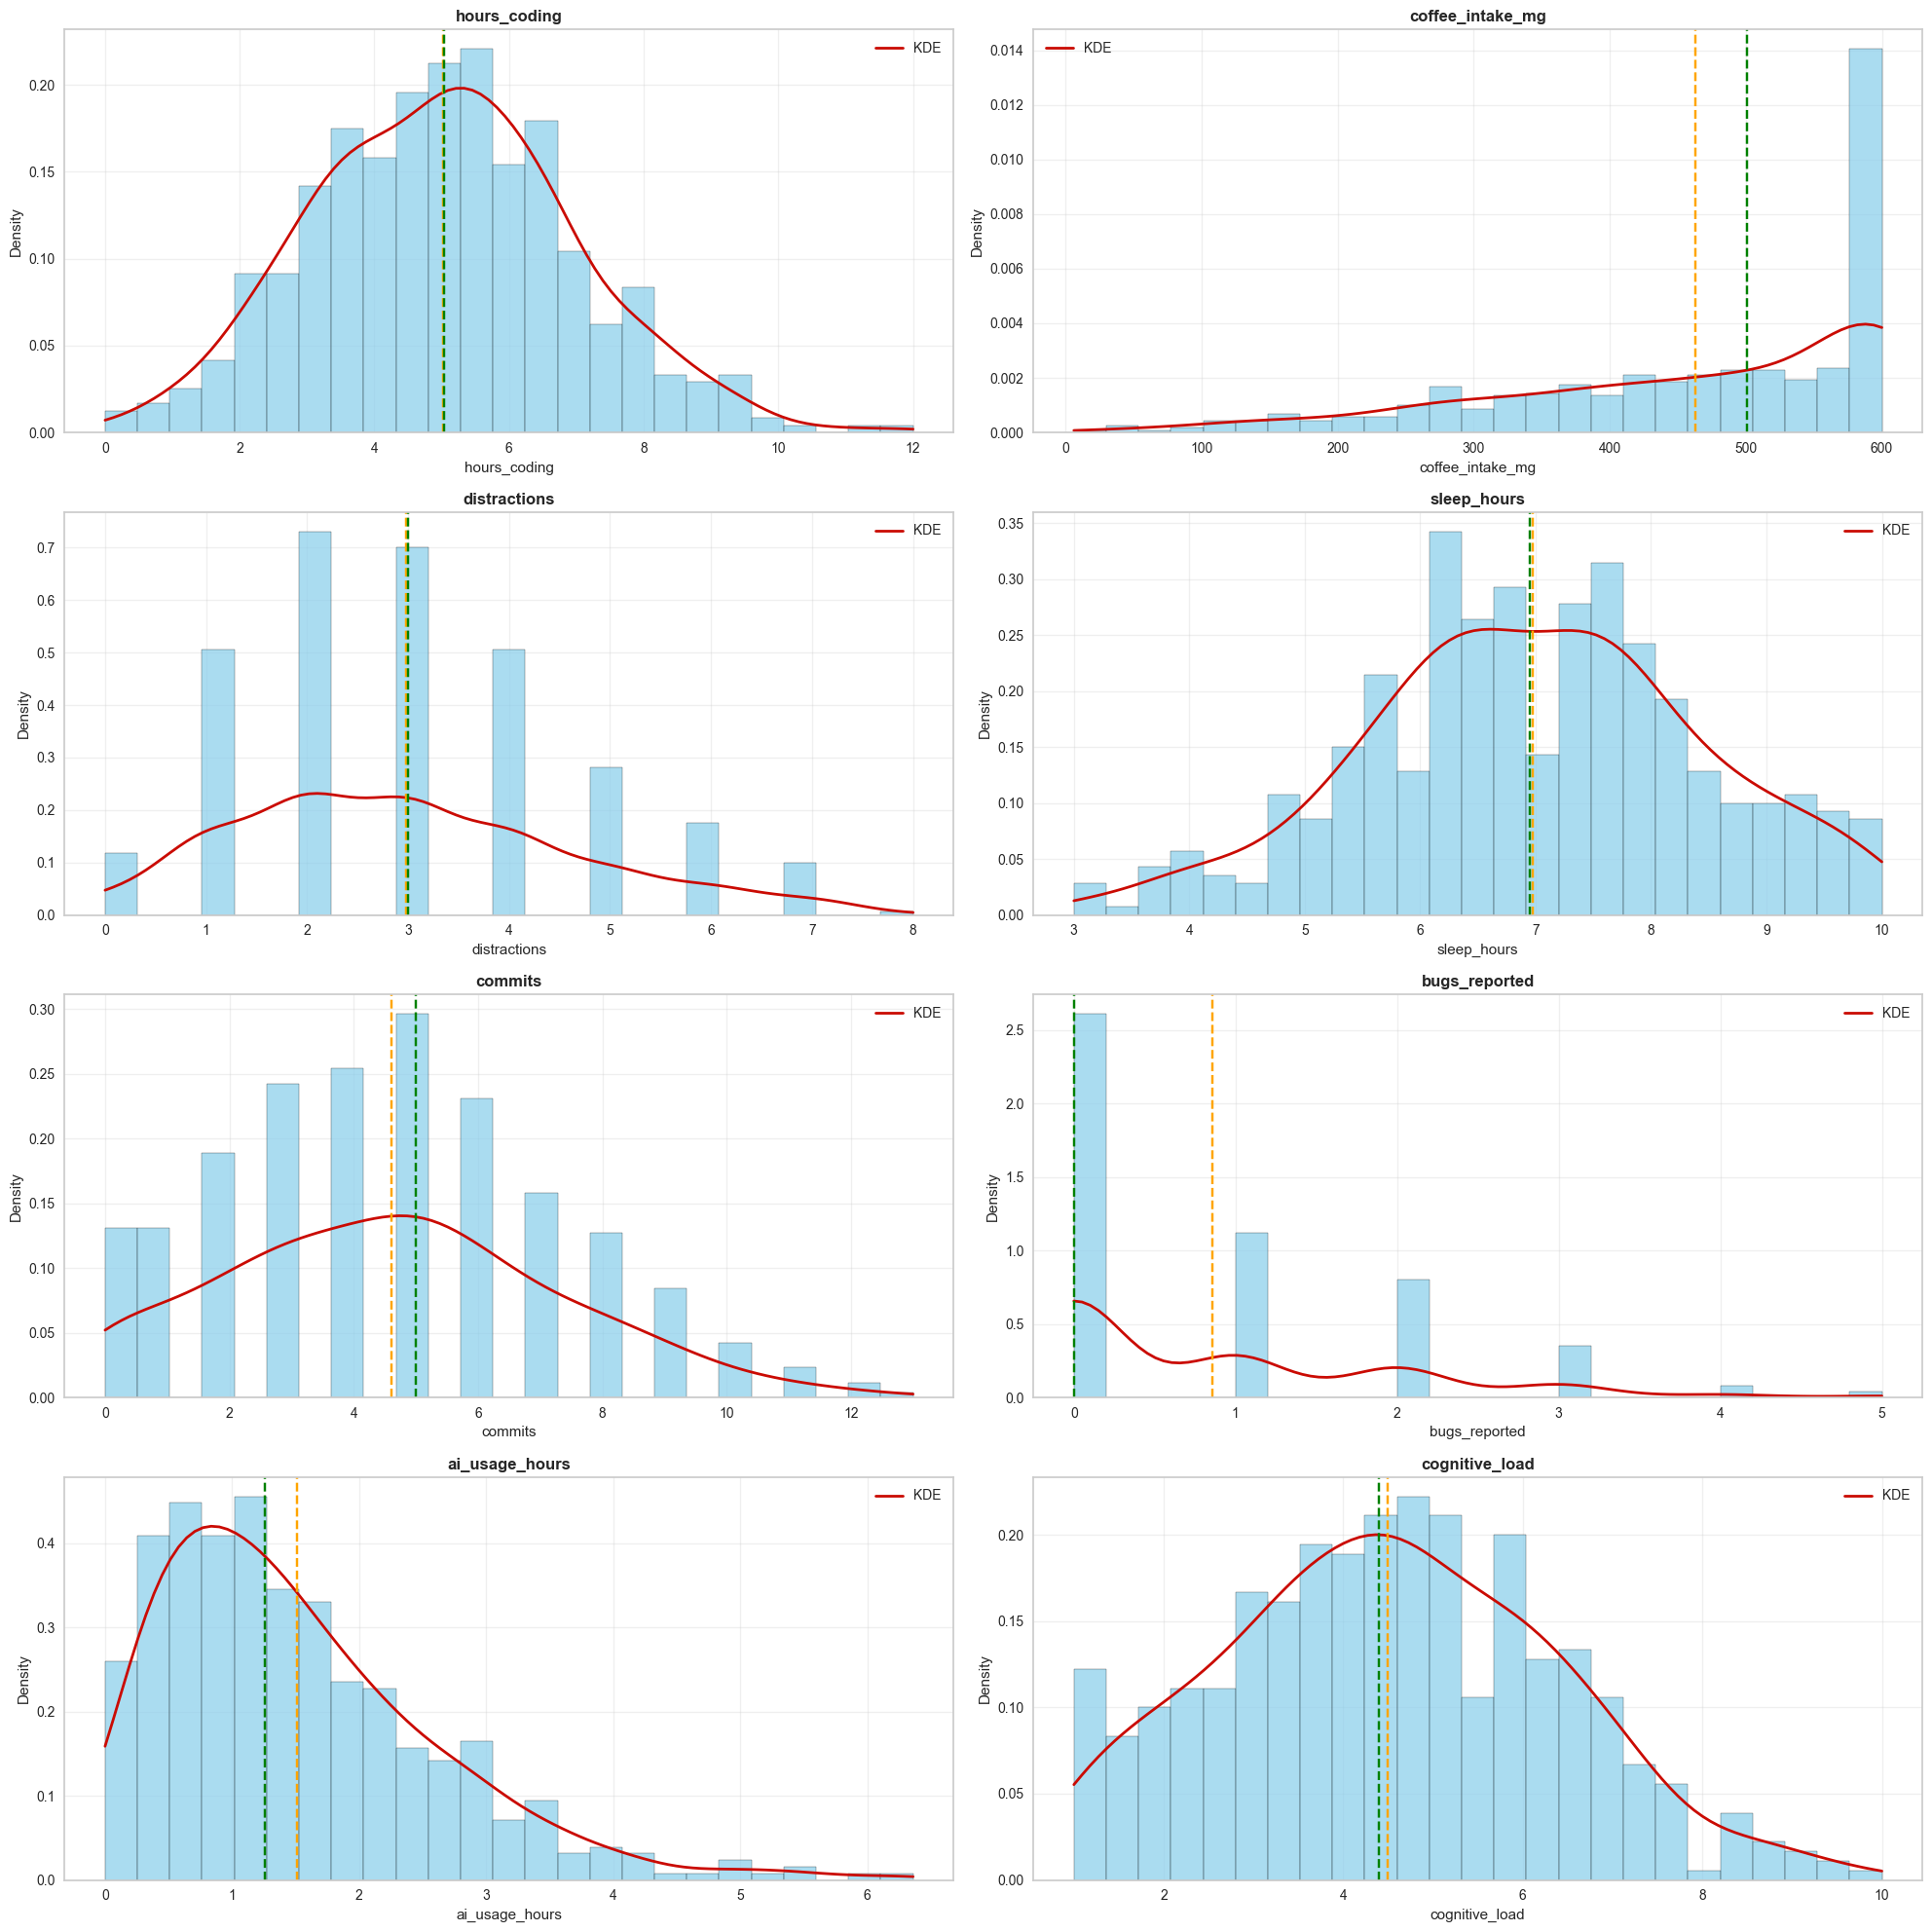

In [45]:
print("\n PERSEBARAN FITUR NUMERIK")
print("=" * 40)

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(df.columns):
    axes[i].hist(df[feature], bins=25, alpha=0.7, density=True, color='skyblue', edgecolor='black')

    x = np.linspace(df[feature].min(), df[feature].max(), 100)
    kde = stats.gaussian_kde(df[feature])
    axes[i].plot(x, kde(x), 'r-', linewidth=2, label='KDE')
    
    axes[i].set_title(f'{feature}', fontsize=12, fontweight='bold')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Density')
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()
    
    # Stats
    mean_val = df[feature].mean()
    median_val = df[feature].median()
    axes[i].axvline(mean_val, color='orange', linestyle='--', label=f'Mean: {mean_val:.2f}')
    axes[i].axvline(median_val, color='green', linestyle='--', label=f'Median: {median_val:.2f}')

plt.tight_layout()
plt.show()

##### Outlier Detection


 BOXPLOT DETEKSI OUTLIER


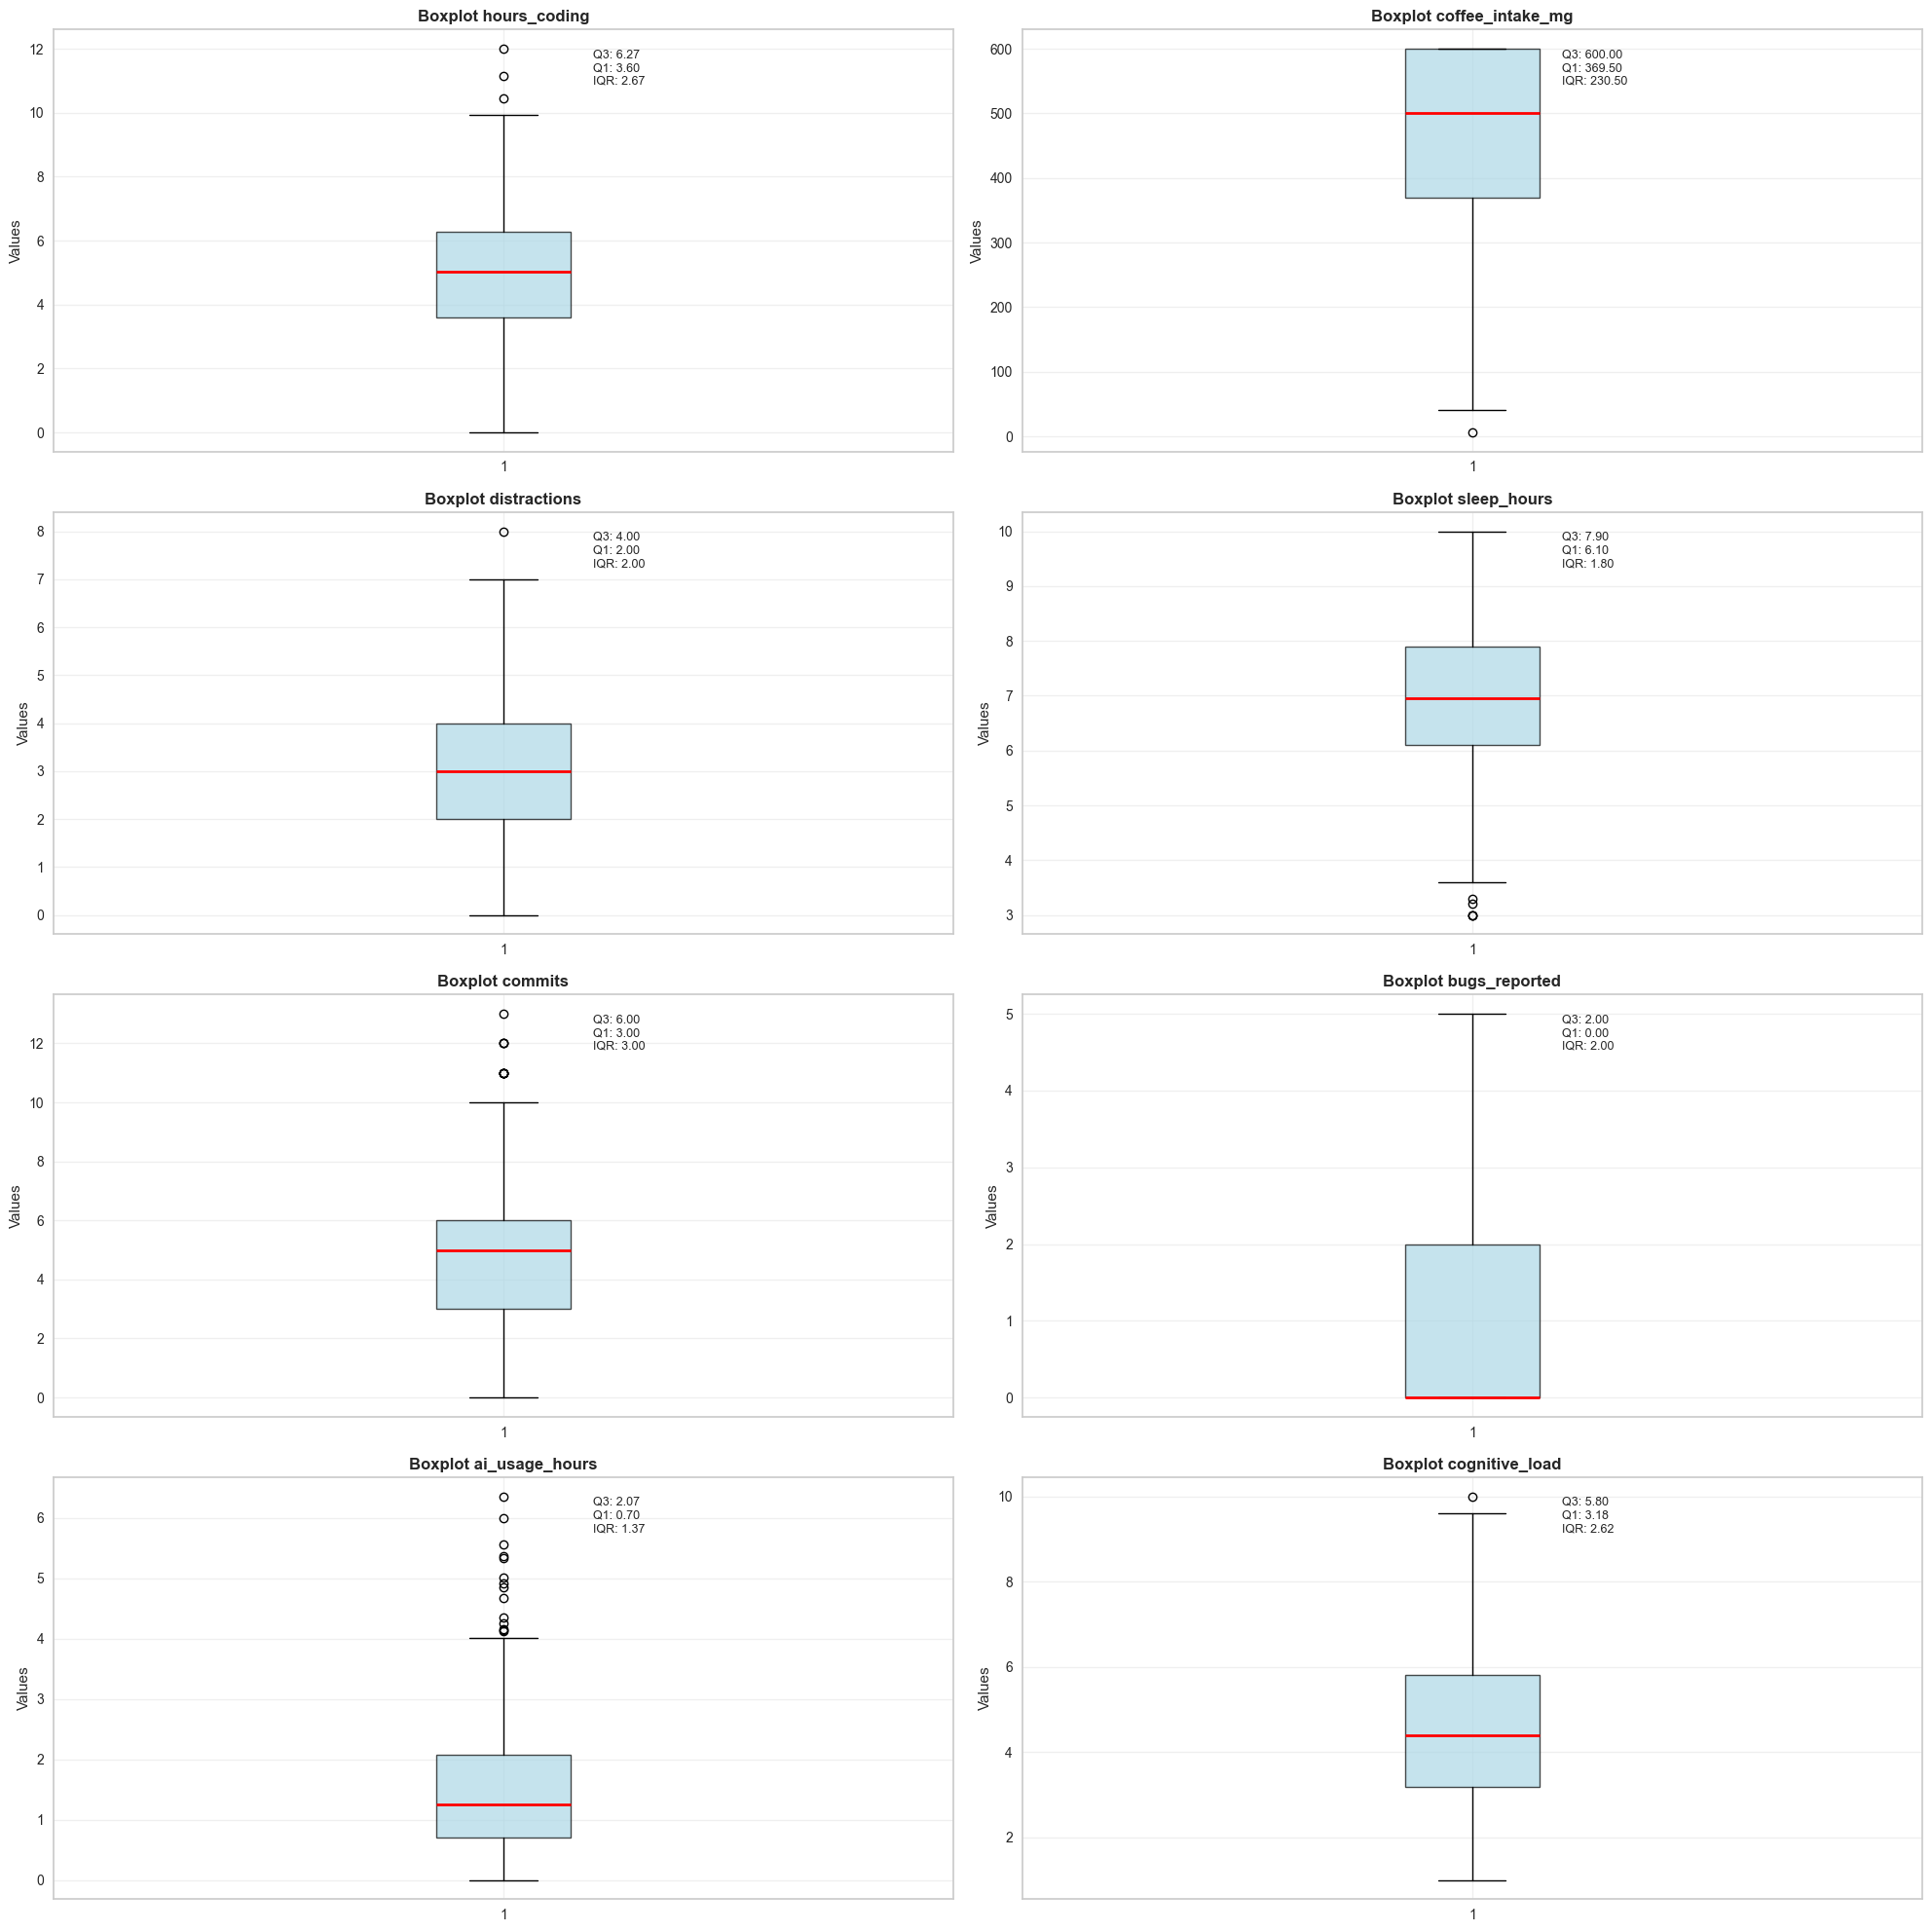

In [46]:
# Deteksi Outlier dengan boxplot
print("\n BOXPLOT DETEKSI OUTLIER")
print("=" * 40)

fig, axes = plt.subplots(4, 2, figsize=(20, 20))
axes = axes.ravel()

for i, feature in enumerate(df.columns):
    # Boxplot
    box_plot = axes[i].boxplot(df[feature], patch_artist=True, 
                              boxprops=dict(facecolor='lightblue', alpha=0.7),
                              medianprops=dict(color='red', linewidth=2))
    
    axes[i].set_title(f'Boxplot {feature}', fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Values')
    axes[i].grid(True, alpha=0.3)
    
    # Tambahkan statistik pada plot
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[i].text(1.1, df[feature].max(), f'Q3: {Q3:.2f}\nQ1: {Q1:.2f}\nIQR: {IQR:.2f}', 
                verticalalignment='top', fontsize=9)

plt.tight_layout()
plt.show()

In [47]:
# Deteksi outlier dengan IQR 
print("\n DETEKSI OUTLIER MENGGUNAKAN IQR")
print("=" * 50)


for feature in df.columns:
    print(f"\n {feature.upper()}")
    print("-" * 30)
    
    # Hitung quartile dan IQR
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    
    # Hitung batas outlier
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identifikasi outlier
    outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
    outlier_count = len(outliers)
    outlier_percentage = (outlier_count / len(df)) * 100
    
    
    print(f"Q1 (25th percentile): {Q1:.3f}")
    print(f"Q3 (75th percentile): {Q3:.3f}")
    print(f"IQR                 : {IQR:.3f}")
    print(f"Lower Bound         : {lower_bound:.3f}")
    print(f"Upper Bound         : {upper_bound:.3f}")
    print(f"Outlier Count       : {outlier_count}")
    print(f"Outlier Percentage  : {outlier_percentage:.2f}%")
    
    if outlier_count > 0:
        print(f"Outlier Range       : {outliers[feature].min():.3f} to {outliers[feature].max():.3f}")


 DETEKSI OUTLIER MENGGUNAKAN IQR

 HOURS_CODING
------------------------------
Q1 (25th percentile): 3.600
Q3 (75th percentile): 6.275
IQR                 : 2.675
Lower Bound         : -0.412
Upper Bound         : 10.287
Outlier Count       : 3
Outlier Percentage  : 0.60%
Outlier Range       : 10.440 to 12.000

 COFFEE_INTAKE_MG
------------------------------
Q1 (25th percentile): 369.500
Q3 (75th percentile): 600.000
IQR                 : 230.500
Lower Bound         : 23.750
Upper Bound         : 945.750
Outlier Count       : 1
Outlier Percentage  : 0.20%
Outlier Range       : 6.000 to 6.000

 DISTRACTIONS
------------------------------
Q1 (25th percentile): 2.000
Q3 (75th percentile): 4.000
IQR                 : 2.000
Lower Bound         : -1.000
Upper Bound         : 7.000
Outlier Count       : 1
Outlier Percentage  : 0.20%
Outlier Range       : 8.000 to 8.000

 SLEEP_HOURS
------------------------------
Q1 (25th percentile): 6.100
Q3 (75th percentile): 7.900
IQR                 : 

##### Korelasi

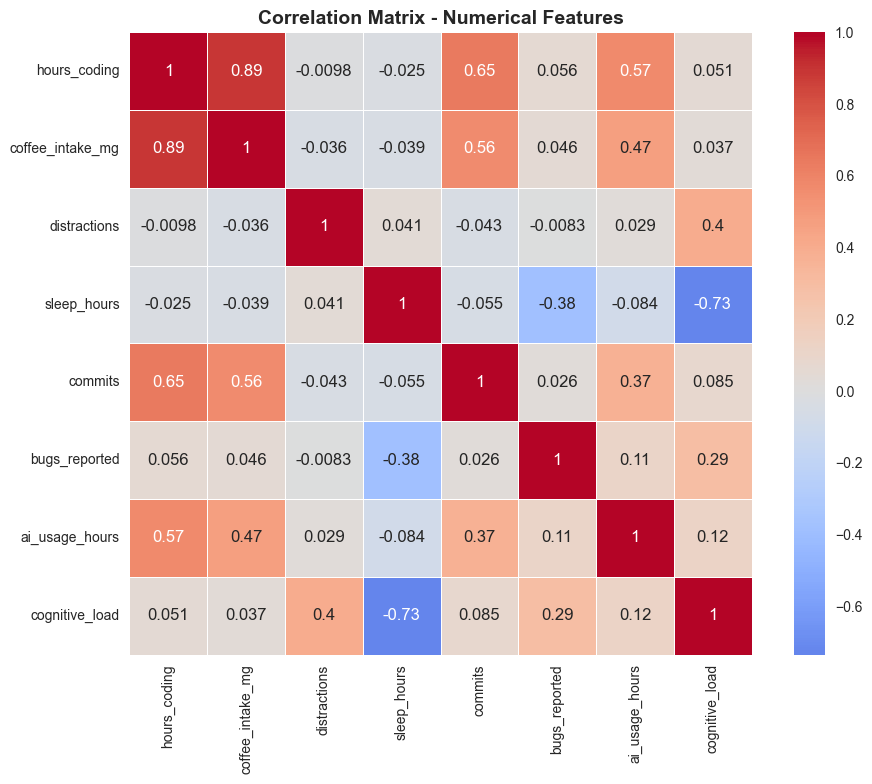

In [48]:
plt.figure(figsize=(10, 8))
correlation_matrix = df[df.columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## Null Values

In [49]:
df.isnull().sum()

hours_coding        0
coffee_intake_mg    0
distractions        0
sleep_hours         0
commits             0
bugs_reported       0
ai_usage_hours      0
cognitive_load      0
dtype: int64

## Data Transformation

In [50]:

def remove_outliers_iqr(df):
    df_clean = df.copy()
    
    for feature in df.columns:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df_clean = df_clean[(df_clean[feature] >= lower_bound) & (df_clean[feature] <= upper_bound)]
    
    return df_clean

print(f"Data sebelum buang outlier: {df.shape}")
df = remove_outliers_iqr(df)
print(f"Data setelah buang outlier: {df.shape}")

Data sebelum buang outlier: (500, 8)
Data setelah buang outlier: (470, 8)


In [51]:
from sklearn.preprocessing import StandardScaler

df_scaled = df.copy()

scaler = StandardScaler()
df_scaled_values = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled_values, columns=df.columns, index=df.index)

print("Standardized")

Standardized


In [52]:
df_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
hours_coding,470.0,1.341716e-16,1.001066,-2.752302,-0.731310,0.050781,0.692860,2.865179
coffee_intake_mg,470.0,-1.398409e-16,1.001066,-2.986421,-0.661853,0.248692,1.005695,1.005695
distractions,470.0,8.692810e-17,1.001066,-1.802214,-0.585202,0.023304,0.631811,2.457329
sleep_hours,470.0,-2.078715e-16,1.001066,-2.452378,-0.663710,-0.019790,0.624131,2.126612
commits,470.0,0.000000e+00,1.001066,-1.760792,-0.561991,-0.162391,0.636810,2.235210
bugs_reported,470.0,-6.047172e-17,1.001066,-0.778623,-0.778623,-0.778623,0.145500,3.841993
ai_usage_hours,470.0,1.285024e-16,1.001066,-1.556442,-0.788065,-0.192295,0.656816,2.875642
cognitive_load,470.0,4.044046e-16,1.001066,-1.902794,-0.737312,-0.015823,0.705666,2.870132


## PCA

In [53]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit(df_scaled)

explained_variance_ratio = pca_full.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio) 

# Mengambil fitur untuk 80% variance
n_components_80 = np.argmax(cumulative_variance_ratio >= 0.8) + 1
pca_optimal = PCA(n_components=n_components_80)
df_pca = pca_optimal.fit_transform(df_scaled)

print("PCA done")

PCA done



PRINCIPAL COMPONENT ANALYSIS (PCA)


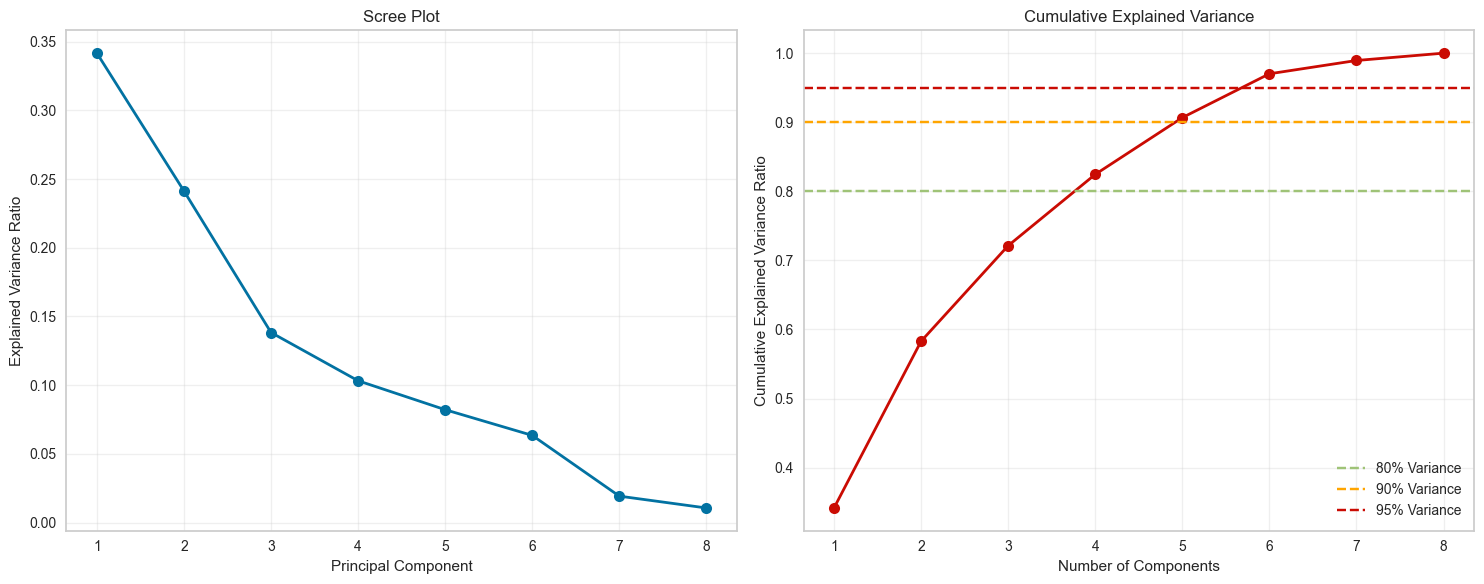

In [54]:
print("\nPRINCIPAL COMPONENT ANALYSIS (PCA)")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scree Plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))

# Cumulative Explained Variance Plot
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='g', linestyle='--', label='80% Variance')
ax2.axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, len(cumulative_variance_ratio) + 1))

plt.tight_layout()
plt.show()

In [55]:
# myPCA
from unsupervised_learning.PCA import myPCA

myPCA_instance = myPCA(n_components= 4)
myPCA_instance.fit(df_scaled)

explained_variance_ratio = myPCA_instance.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

myPCA_data = myPCA_instance.fit_transform(df_scaled)


 myPCA 


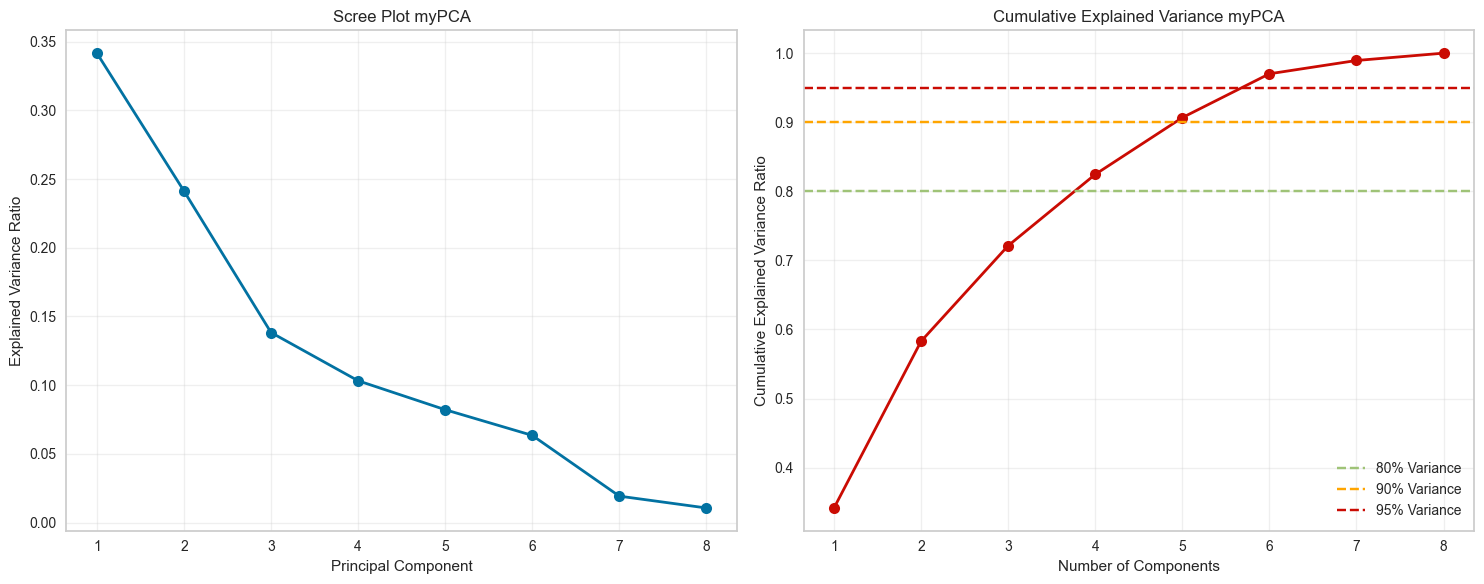

In [56]:
print("\n myPCA ")
print("=" * 50)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Scree Plot
ax1.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, 'bo-', linewidth=2, markersize=8)
ax1.set_xlabel('Principal Component')
ax1.set_ylabel('Explained Variance Ratio')
ax1.set_title('Scree Plot myPCA')
ax1.grid(True, alpha=0.3)
ax1.set_xticks(range(1, len(explained_variance_ratio) + 1))

# Cumulative Explained Variance Plot
ax2.plot(range(1, len(cumulative_variance_ratio) + 1), cumulative_variance_ratio, 'ro-', linewidth=2, markersize=8)
ax2.axhline(y=0.8, color='g', linestyle='--', label='80% Variance')
ax2.axhline(y=0.9, color='orange', linestyle='--', label='90% Variance')
ax2.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
ax2.set_xlabel('Number of Components')
ax2.set_ylabel('Cumulative Explained Variance Ratio')
ax2.set_title('Cumulative Explained Variance myPCA')
ax2.legend()
ax2.grid(True, alpha=0.3)
ax2.set_xticks(range(1, len(cumulative_variance_ratio) + 1))

plt.tight_layout()
plt.show()

## DBSCAN

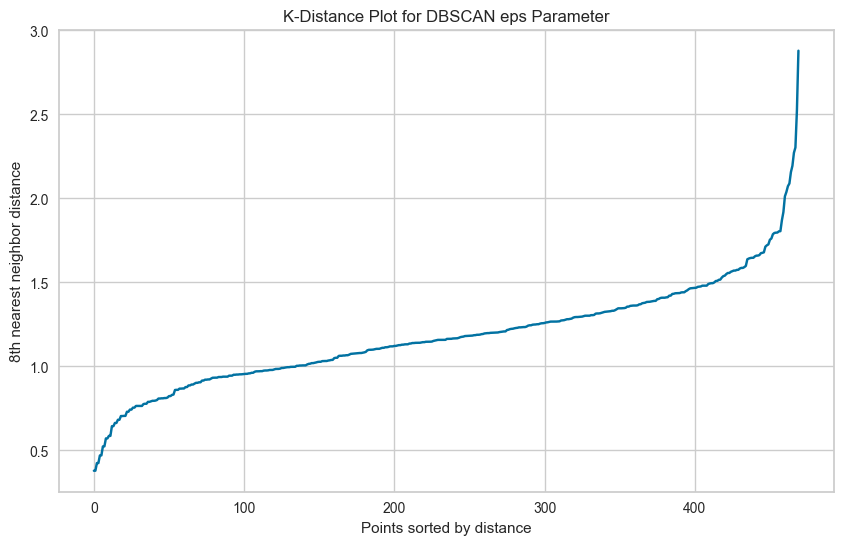

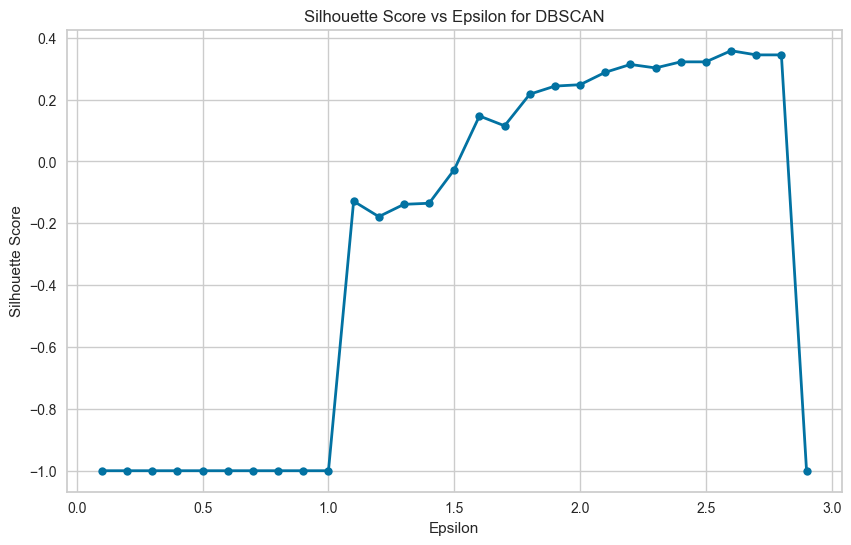

Optimal epsilon: 2.6
Best silhouette score: 0.3578


In [57]:
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score,silhouette_samples
from sklearn.cluster import DBSCAN

k = 8
nbrs = NearestNeighbors(n_neighbors=k).fit(df_scaled)
distances, indices = nbrs.kneighbors(df_scaled)

distances = np.sort(distances, axis=0)
distances = distances[:,1]

plt.figure(figsize=(10, 6))
plt.plot(distances)
plt.title('K-Distance Plot for DBSCAN eps Parameter')
plt.xlabel('Points sorted by distance')
plt.ylabel('8th nearest neighbor distance')
plt.grid(True)
plt.show()

eps_values = np.arange(0.1, 3.0, 0.1)
silhouette_scores = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=8)
    labels = dbscan.fit_predict(df_scaled)
    if len(set(labels)) > 1:  # Minimal 2 cluster
        score = silhouette_score(df_scaled, labels)
        silhouette_scores.append(score)
    else:
        silhouette_scores.append(-1)

plt.figure(figsize=(10, 6))
plt.plot(eps_values, silhouette_scores, 'bo-', linewidth=2, markersize=6)
plt.xlabel('Epsilon')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs Epsilon for DBSCAN')
plt.grid(True)
plt.show()

best_eps = eps_values[np.argmax(silhouette_scores)]
print(f"Optimal epsilon: {best_eps:.1f}")
print(f"Best silhouette score: {max(silhouette_scores):.4f}")

Nilai epsilon 2.6 dipilih karena menunjukan Silhouette Score paling tinggi

In [58]:
#DBSCAN SKLEARN

db = DBSCAN(eps=2.6, min_samples=8)
db.fit(df_scaled)
sPredDB = pd.Series(db.labels_)
print(pd.concat({'count': sPredDB.value_counts(),
                 'percent': round(sPredDB.value_counts(normalize=True)*100, 2)}, 
                axis=1))

    count  percent
 0    468    99.57
-1      2     0.43


In [59]:
#Analisis karakteristik cluster
df_original = df.copy()

df_original['kmeans_cluster'] = sPredDB

print("\nKarakteristik rata-rata per cluster:")
print("=" * 50)
cluster_chars_DB = df_original.groupby('kmeans_cluster').agg({
    'ai_usage_hours': 'mean',
    'distractions': 'mean',
    'sleep_hours': 'mean',
    'bugs_reported': 'mean',
    'coffee_intake_mg': 'mean',
    'hours_coding': 'mean',
    'commits': 'mean',
    'cognitive_load': 'mean'

}).round(3)

cluster_chars_DB


Karakteristik rata-rata per cluster:


,ai_usage_hours,distractions,sleep_hours,bugs_reported,coffee_intake_mg,hours_coding,commits,cognitive_load
kmeans_cluster,,,,,,,,
-1.0,0.815,6.000,7.550,2.500,383.000,4.920,4.50,5.35
0.0,1.396,2.959,7.013,0.832,460.884,4.871,4.42,4.41


In [60]:
# Evaluasi Silhouette Score dari hasil DBSCAN SKLEARN
silhouette_avg = silhouette_score(df_scaled, sPredDB)
print(f"\nSilhouette Score untuk DBSCAN (eps={best_eps:.1f}): {silhouette_avg:.4f}")

silhouette_sample_scores = silhouette_samples(df_scaled, sPredDB)

# Analisis per cluster
print("\nSilhouette Score per cluster:")
for i in range(2):
    cluster_silhouette_scores = silhouette_sample_scores[sPredDB == i]
    print(f"Cluster {i}: {cluster_silhouette_scores.mean():.4f} (±{cluster_silhouette_scores.std():.4f})")


Silhouette Score untuk DBSCAN (eps=2.6): 0.3578

Silhouette Score per cluster:
Cluster 0: 0.3584 (±0.1584)
Cluster 1: nan (±nan)


In [61]:
# myDBSCAN
from unsupervised_learning.DBSCAN import myDBSCAN

myDBSCAN_instance = myDBSCAN(eps=2.6, min_samples=8)
myDBSCAN_instance.fit(df_scaled.to_numpy())

sPredDB = pd.Series(myDBSCAN_instance.labels_)
print(pd.concat({'count': sPredDB.value_counts(),
                 'percent': round(sPredDB.value_counts(normalize=True)*100, 2)}, 
                axis=1))

    count  percent
 1    468    99.57
-1      2     0.43


In [62]:
#Analisis karakteristik cluster myDBSCAN
df_original = df.copy()

df_original['kmeans_cluster'] = sPredDB

print("\nKarakteristik rata-rata per cluster:")
print("=" * 50)
cluster_chars_DB = df_original.groupby('kmeans_cluster').agg({
    'ai_usage_hours': 'mean',
    'distractions': 'mean',
    'sleep_hours': 'mean',
    'bugs_reported': 'mean',
    'coffee_intake_mg': 'mean',
    'hours_coding': 'mean',
    'commits': 'mean',
    'cognitive_load': 'mean'

}).round(3)

cluster_chars_DB


Karakteristik rata-rata per cluster:


,ai_usage_hours,distractions,sleep_hours,bugs_reported,coffee_intake_mg,hours_coding,commits,cognitive_load
kmeans_cluster,,,,,,,,
-1.0,0.815,6.000,7.550,2.500,383.000,4.920,4.50,5.35
1.0,1.396,2.959,7.013,0.832,460.884,4.871,4.42,4.41


In [63]:
# Evaluasi Silhouette Score dari hasil myDBSCAN
silhouette_avg = silhouette_score(df_scaled, sPredDB)
print(f"\nSilhouette Score untuk myDBSCAN (eps={best_eps:.1f}): {silhouette_avg:.4f}")

silhouette_sample_scores = silhouette_samples(df_scaled, sPredDB)

# Analisis per cluster
print("\nSilhouette Score per cluster:")
for i in range(2):
    cluster_silhouette_scores = silhouette_sample_scores[sPredDB == i]
    print(f"Cluster {i}: {cluster_silhouette_scores.mean():.4f} (±{cluster_silhouette_scores.std():.4f})")


Silhouette Score untuk myDBSCAN (eps=2.6): 0.3578

Silhouette Score per cluster:
Cluster 0: nan (±nan)
Cluster 1: 0.3584 (±0.1584)


## K-Means

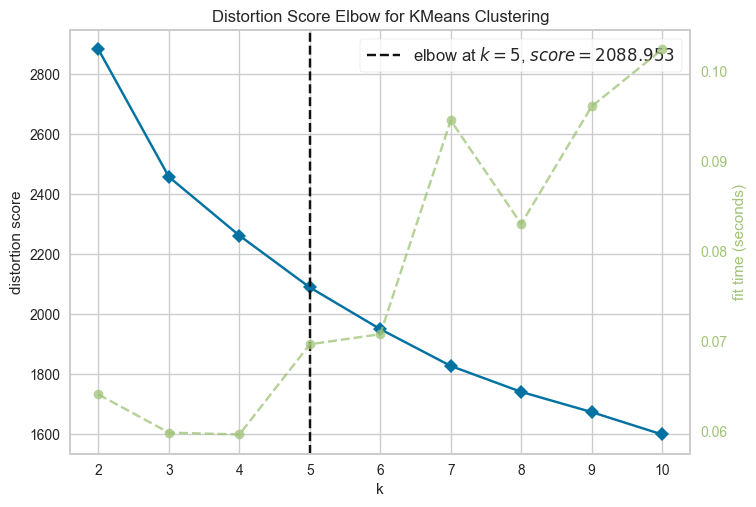

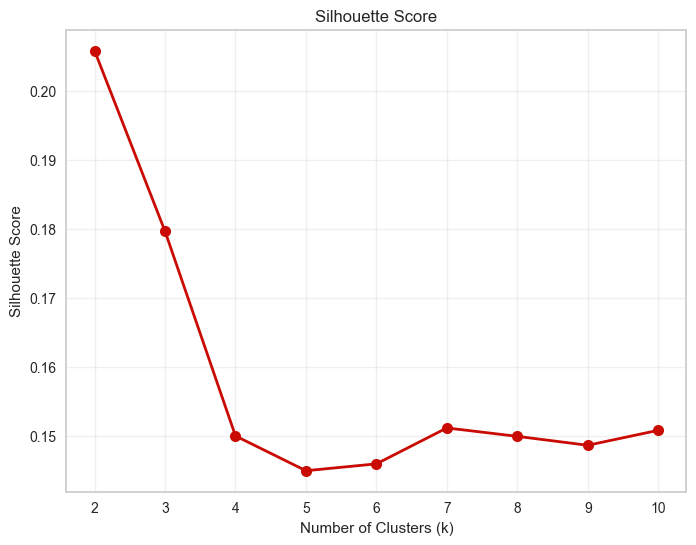

Optimal k berdasarkan silhouette score: 2
Silhouette Score: 0.2058


In [64]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
from warnings import filterwarnings

filterwarnings("ignore")

# Elbow Method 
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion')
visualizer.fit(df_scaled)
visualizer.show()

# Silhouette Score
silhouette_scores = []
k_range = np.arange(2, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(df_scaled)
    silhouette_scores.append(silhouette_score(df_scaled, kmeans.labels_))

# Plot Silhouette Score
plt.figure(figsize=(8, 6))
plt.plot(k_range, silhouette_scores, 'ro-', linewidth=2, markersize=8)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.grid(True, alpha=0.3)
plt.show()

# Hasil terbaik
best_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal k berdasarkan silhouette score: {best_k}")
print(f"Silhouette Score: {max(silhouette_scores):.4f}")

In [71]:
# K-Means SKLEARN
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
kmeans_final.fit(df_scaled)
sPredKM = pd.Series(kmeans_final.labels_)
pd.concat({'count': sPredKM.value_counts(),
                 'percent': round(sPredKM.value_counts(normalize=True)*100, 2)}, 
                axis=1)

,count,percent
0,271,57.66
1,199,42.34


In [72]:
#Analisis karakteristik cluster
df_original = df.copy()

df_original['kmeans_cluster'] = sPredKM

print("\nKarakteristik rata-rata per cluster:")
print("=" * 50)
cluster_chars_KM = df_original.groupby('kmeans_cluster').agg({
    'ai_usage_hours': 'mean',
    'distractions': 'mean',
    'sleep_hours': 'mean',
    'bugs_reported': 'mean',
    'coffee_intake_mg': 'mean',
    'hours_coding': 'mean',
    'commits': 'mean',
    'cognitive_load': 'mean'

}).round(3)

cluster_chars_KM


Karakteristik rata-rata per cluster:


,ai_usage_hours,distractions,sleep_hours,bugs_reported,coffee_intake_mg,hours_coding,commits,cognitive_load
kmeans_cluster,,,,,,,,
0.0,1.376,3.000,7.038,0.827,466.753,4.929,4.443,4.372
1.0,1.417,2.936,6.986,0.856,452.096,4.792,4.388,4.471


In [73]:
# Evaluasi Silhouette Score dari hasil K-Means SKLEARN
silhouette_avg = silhouette_score(df_scaled, sPredKM)
print(f"\nSilhouette Score untuk K-Means (k=2): {silhouette_avg:.4f}")

silhouette_sample_scores = silhouette_samples(df_scaled, sPredKM)

# Analisis per cluster
print("\nSilhouette Score per cluster:")
for i in range(2):
    cluster_silhouette_scores = silhouette_sample_scores[sPredKM == i]
    print(f"Cluster {i}: {cluster_silhouette_scores.mean():.4f} (±{cluster_silhouette_scores.std():.4f})")


Silhouette Score untuk K-Means (k=2): 0.2058

Silhouette Score per cluster:
Cluster 0: 0.1821 (±0.1062)
Cluster 1: 0.2381 (±0.1033)


In [77]:
# myKMEANS
from unsupervised_learning.Kmeans import myKmeans
myKmeans_instance = myKmeans(n_clusters=2)
myKmeans_instance.fit(df_scaled.to_numpy())

sPredKM = pd.Series(myKmeans_instance.labels_)
pd.concat({'count': sPredKM.value_counts(),
                'percent': round(sPredKM.value_counts(normalize=True)*100, 2)}, 
                axis=1)

,count,percent
1,265,56.38
0,205,43.62


In [78]:
#Analisis karakteristik cluster myKmeans
df_original = df.copy()

df_original['kmeans_cluster'] = sPredKM

print("\nKarakteristik rata-rata per cluster myKmeans:")
print("=" * 50)
cluster_chars_KM = df_original.groupby('kmeans_cluster').agg({
    'ai_usage_hours': 'mean',
    'distractions': 'mean',
    'sleep_hours': 'mean',
    'bugs_reported': 'mean',
    'coffee_intake_mg': 'mean',
    'hours_coding': 'mean',
    'commits': 'mean',
    'cognitive_load': 'mean'

}).round(3)

cluster_chars_KM


Karakteristik rata-rata per cluster myKmeans:


,ai_usage_hours,distractions,sleep_hours,bugs_reported,coffee_intake_mg,hours_coding,commits,cognitive_load
kmeans_cluster,,,,,,,,
0.0,1.431,2.933,6.981,0.850,452.860,4.822,4.42,4.473
1.0,1.365,3.004,7.043,0.832,466.456,4.909,4.42,4.368


In [79]:
# Evaluasi Silhouette Score dari hasil myKmeans
silhouette_avg = silhouette_score(df_scaled, sPredKM)
print(f"\nSilhouette Score untuk myKmeans (k=2): {silhouette_avg:.4f}")

silhouette_sample_scores = silhouette_samples(df_scaled, sPredKM)

# Analisis per cluster
print("\nSilhouette Score per cluster:")
for i in range(2):
    cluster_silhouette_scores = silhouette_sample_scores[sPredKM == i]
    print(f"Cluster {i}: {cluster_silhouette_scores.mean():.4f} (±{cluster_silhouette_scores.std():.4f})")


Silhouette Score untuk myKmeans (k=2): 0.2051

Silhouette Score per cluster:
Cluster 0: 0.2399 (±0.1043)
Cluster 1: 0.1781 (±0.1052)
